### Introduction

The goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Some questions that are posed:
- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

Data was provided by Codecademy.com.

Note: The data for this project is *inspired* by real data, but is mostly fictional.

### Loading and Exploring the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

obs = pd.read_csv('observations.csv')
info = pd.read_csv('species_info.csv')
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [2]:
obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [3]:
info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


### What is the distribution of conservation status for species?

In [5]:
info.conservation_status.value_counts(dropna=False, normalize=True)

NaN                   0.967205
Species of Concern    0.027644
Endangered            0.002747
Threatened            0.001717
In Recovery           0.000687
Name: conservation_status, dtype: float64

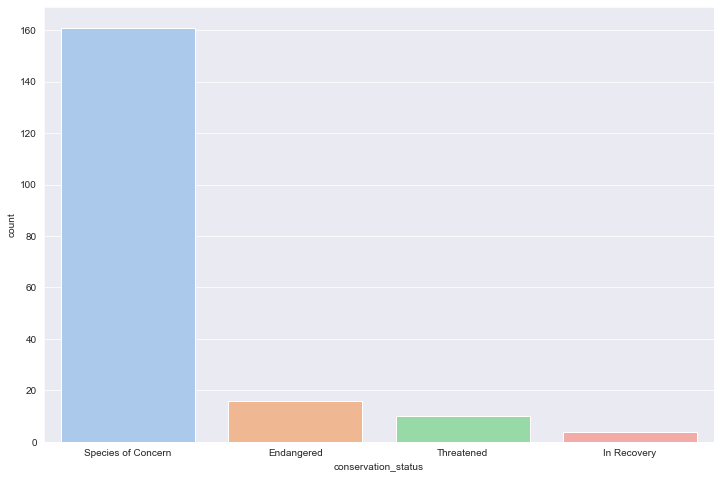

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.countplot(x='conservation_status', data=info)
plt.show()
plt.clf()

In [7]:
p = pd.crosstab(info.conservation_status, info.category)
p

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1,4,3,7,0,0,1
In Recovery,0,3,0,1,0,0,0
Species of Concern,4,72,4,28,5,5,43
Threatened,2,0,4,2,0,0,2


Text(0.5, 0, 'Conservation Status')

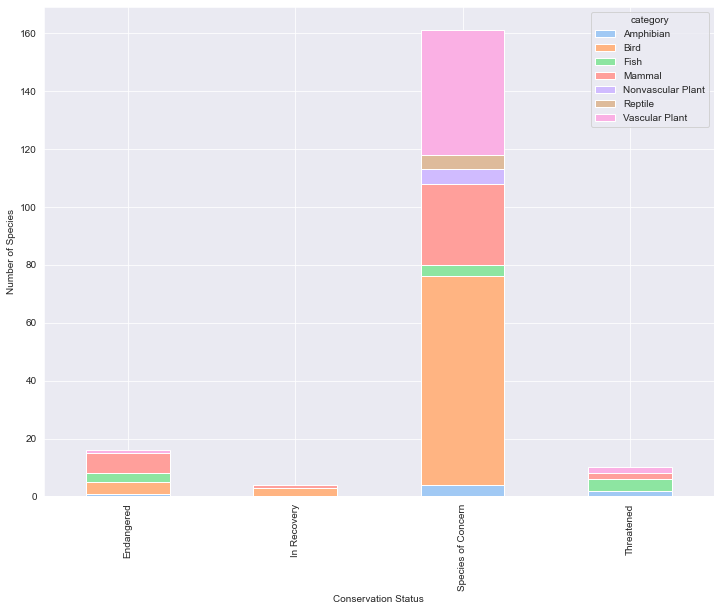

In [8]:
ax = p.plot(kind='bar', figsize=(12,9), stacked=True)
ax.set_ylabel('Number of Species')
ax.set_xlabel('Conservation Status')

### Are certain types of species more likely to be endangered?

In [9]:
info.fillna('No Intervention', inplace=True)
info['intervention'] = info.conservation_status != 'No Intervention'
p = info.groupby(['category', 'intervention'])\
        .scientific_name.nunique().reset_index()\
        .pivot(columns='intervention', index='category', values='scientific_name')
p['endangered_pct'] = round(p[True] / (p[False] + p[True]) * 100, 2)
p

intervention,False,True,endangered_pct
category,,,
Amphibian,72,7,8.86
Bird,413,75,15.37
Fish,115,11,8.73
Mammal,146,30,17.05
Nonvascular Plant,328,5,1.50
Reptile,73,5,6.41
Vascular Plant,4216,46,1.08


### Are the differences between species and their conservation status significant?

In [10]:
from scipy.stats import chi2_contingency

xtab = [[413, 75],
       [146, 30]]
xtab1 = pd.crosstab(info.conservation_status, info.category)
chi2, pval, dof, expected = chi2_contingency(xtab)
pval

0.6875948096661336

In [11]:
xtab = [[73, 5],
       [146, 30]]
chi2, pval, dof, expected = chi2_contingency(xtab)
pval

0.03835559022969898

### Which animal is most prevalent and what is their distribution amongst parks?

In [12]:
import string
punc = '['+string.punctuation+']'
animals = info[(info.category != 'Nonvascular Plant') & (info.category != 'Vascular Plant')]\
    .common_names.str.replace(punc, '', regex=True).str.split()

animals

0                              [Gappers, RedBacked, Vole]
1                                [American, Bison, Bison]
2       [Aurochs, Aurochs, Domestic, Cattle, Feral, Do...
3       [Domestic, Sheep, Mouflon, Red, Sheep, Sheep, ...
4                                       [Wapiti, Or, Elk]
                              ...                        
4610                                           [Hardhead]
4611                             [Sacramento, Pikeminnow]
4612                         [Lahontan, Cutthroat, Trout]
4613                          [California, Golden, Trout]
4614                                    [Riffle, Sculpin]
Name: common_names, Length: 1021, dtype: object

In [13]:
name_lst = []
for i in animals:
    i = list(set(i))
    name_lst.append(i)
name_lst = [i for sublist in name_lst for i in sublist]
name_lst[:5]

['Gappers', 'RedBacked', 'Vole', 'Bison', 'American']

In [14]:
name_lst = pd.Series(name_lst)
with pd.option_context('display.max_rows', None,):
    print(name_lst.value_counts(dropna=False).head(15))

Warbler       59
Northern      53
Salamander    41
Eastern       39
American      37
Common        31
Western       31
Sparrow       29
Snake         28
Mountain      23
Bat           23
Shiner        20
Darter        19
Gray          19
Owl           18
dtype: int64


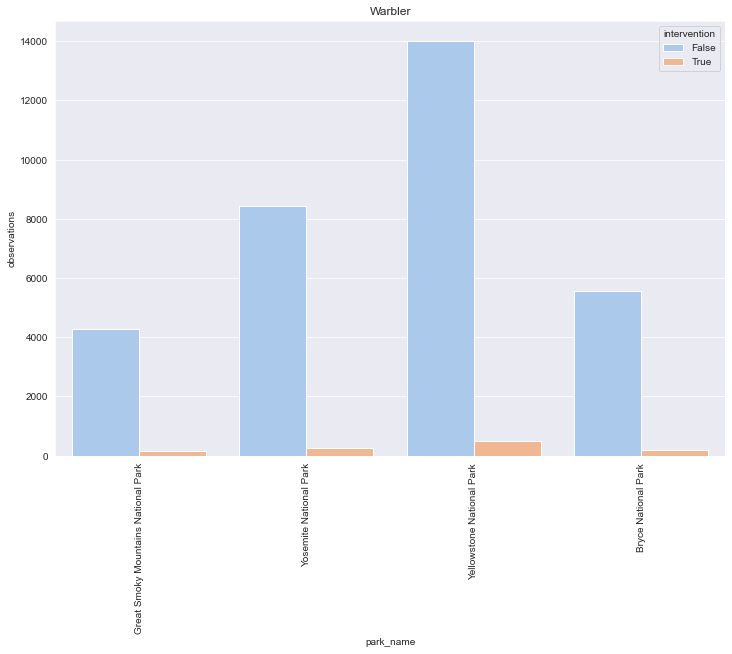

observation of warbler: 33,394


<Figure size 432x288 with 0 Axes>

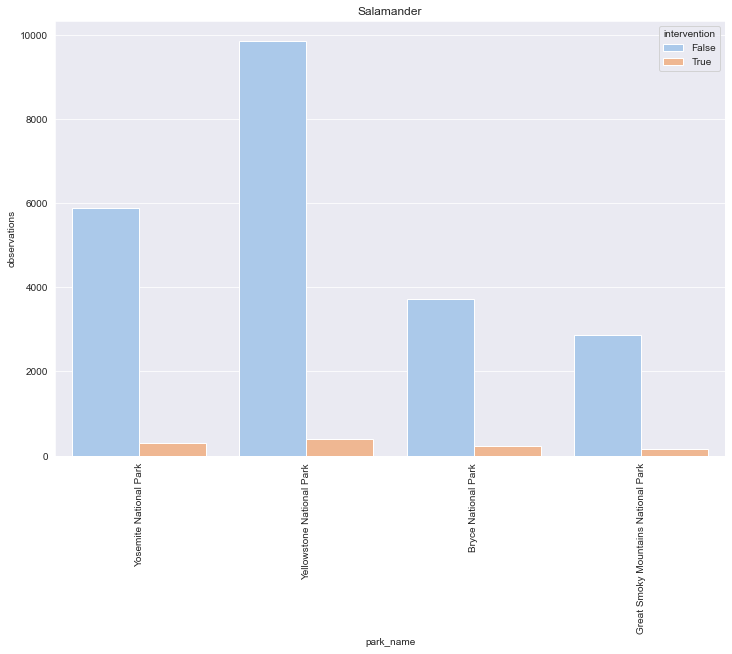

observation of salamander: 23,377


<Figure size 432x288 with 0 Axes>

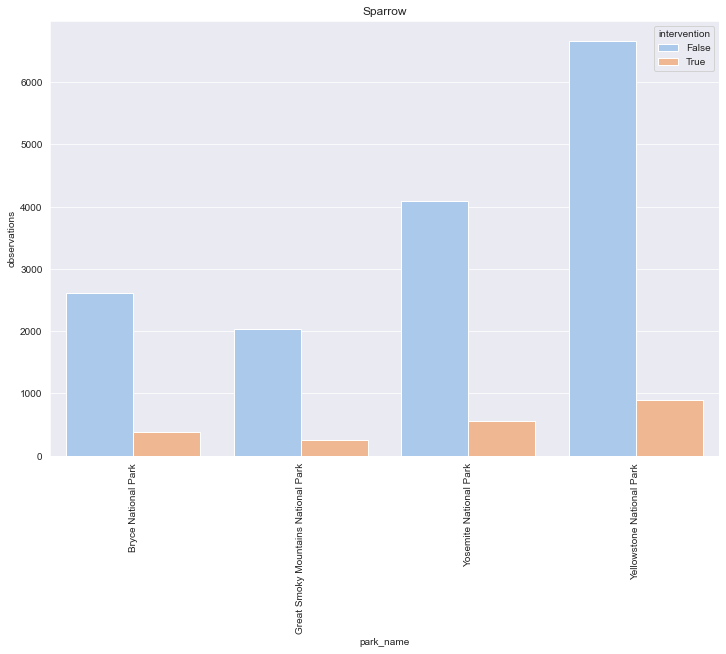

observation of sparrow: 17,467


<Figure size 432x288 with 0 Axes>

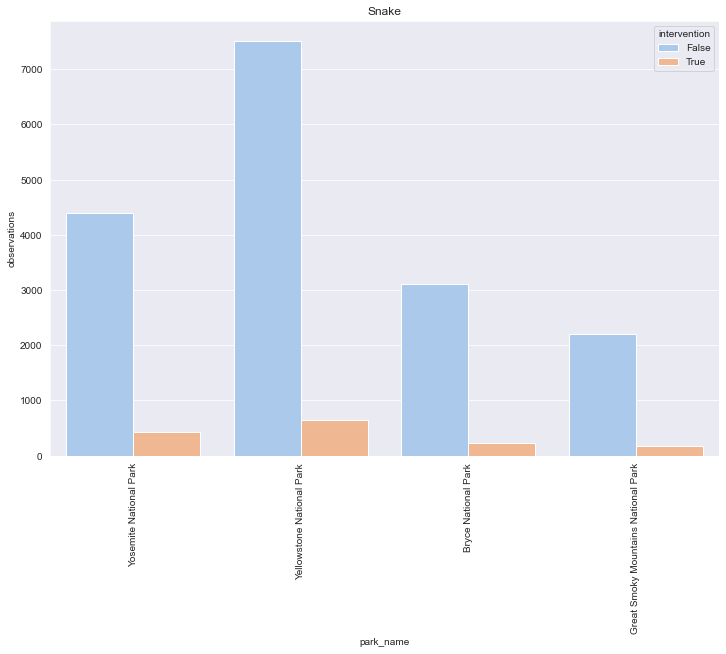

observation of snake: 18,690


<Figure size 432x288 with 0 Axes>

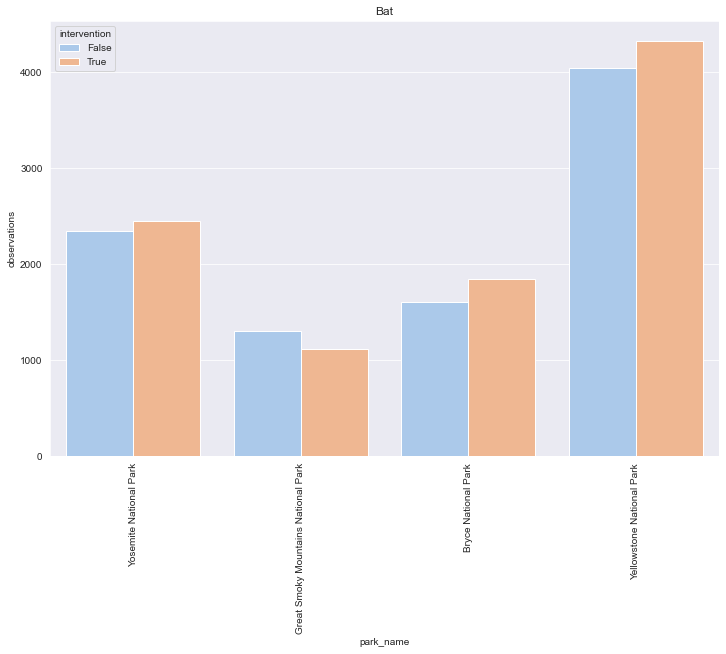

observation of bat: 18,992


<Figure size 432x288 with 0 Axes>

In [15]:
top5 = ['Warbler', 'Salamander', 'Sparrow', 'Snake', 'Bat']
for i in top5:
    a = info[info.common_names.str.contains(fr'\b{i}\b', regex=True)]
    a = a.merge(obs, on='scientific_name')
    plt.figure(figsize=(12,8))
    sns.barplot(data=a, x='park_name', y='observations', hue='intervention', estimator=sum, ci=None)
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()
    plt.clf()
    print('observation of {}: {:,}'.format(i.lower(), a.observations.sum()))

### Conclusion

This project was also able to answer the questions posed:

- What is the distribution of conservation status for species?
    - The vast majority of species (96.72%) were not part of conservation.
- Are certain types of species more likely to be endangered?
    - Mammals (17.05%) and Birds (15.37%) had the highest percentage of being in protection.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which animal is most prevalent and what is their distribution amongst parks?
    - the study found that warblers has the most number of species (59) with total of 33,394 observations and they were most likely to be found in Yellowstone National Park.
    - 5 of the animals with the most number of species have low intervention rates except for bats which is about half.